# Neural network for regression

## import packages

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Load data

In [3]:
data= pd.read_csv('stock_data.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-08-27,9982.179688,10159.879883,9936.620117,10150.650391,10150.650391,207760000
1,2010-08-30,10145.580078,10150.570313,10007.679688,10009.730469,10009.730469,150480000
2,2010-08-31,10006.419922,10073.379883,9941.839844,10014.719727,10014.719727,255420000
3,2010-09-01,10016.009766,10279.080078,10016.009766,10269.469727,10269.469727,205710000
4,2010-09-02,10270.080078,10320.370117,10253.959961,10320.099609,10320.099609,149930000


# Data preparation

## Dimension of dataset

In [5]:
data.shape

(2014, 7)

# Statistical Summary

In [6]:
# description
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2.014000e+03
mean,16756.880170,16835.962791,16676.660195,16762.755255,16762.755255,1.699523e+08
std,3985.884743,3992.888506,3977.350484,3984.242430,3984.242430,1.072222e+08
min,9982.179688,10073.379883,9936.620117,10009.730469,10009.730469,8.410000e+06
25%,13104.239746,13175.674805,13045.425049,13107.277588,13107.277588,9.486500e+07
50%,16566.544922,16652.890625,16500.360352,16571.265625,16571.265625,1.284750e+08
75%,18282.699219,18350.062988,18205.062500,18287.908203,18287.908203,2.177400e+08
max,26584.279297,26616.710938,26435.339844,26616.710938,26616.710938,8.239400e+08


## Splitting target variable

In [7]:
predictor = data.iloc[:,[1,2,3,5,6]]
target= data.iloc[:,4]

## Standardize features

In [8]:
scaler=StandardScaler()
predictor=scaler.fit_transform(predictor)

## Train test data split

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(predictor,target,test_size=0.30,random_state=0)
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (1409, 5)
x_test (605, 5)
y_train (1409,)
y_test (605,)


# Neural Network

In [10]:
# import the neural network library
from sklearn.neural_network import MLPRegressor

In [11]:
# build model with neural network 
nn_model =MLPRegressor().fit(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
# predict usind built model
predictvalues=nn_model.predict(x_test)

In [13]:
# coefficient of determination R^2 of the predicted model
nn_model.score(x_train,y_train)

-16.090411131422005

In [15]:
# check the rsme (root mean square error)
from sklearn.metrics import mean_squared_error
import math
print(math.sqrt(mean_squared_error(y_test,predictvalues)))

16290.114848931851


Text(0, 0.5, 'predicted data')

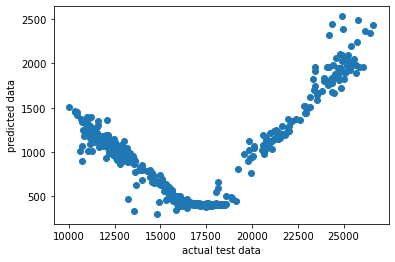

In [16]:
# checkingscatter data between y_test and predicted values
plt.scatter(y_test,predictvalues)
plt.xlabel('actual test data')
plt.ylabel('predicted data')

In [17]:
help(MLPRegressor)

Help on class MLPRegressor in module sklearn.neural_network._multilayer_perceptron:

class MLPRegressor(sklearn.base.RegressorMixin, BaseMultilayerPerceptron)
 |  MLPRegressor(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
 |  
 |  Multi-layer Perceptron regressor.
 |  
 |  This model optimizes the squared error using LBFGS or stochastic gradient
 |  descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'identity', 'logis

# Build Model with Neural network

## with hidden layers,Activation function, solver and learning rate 

In [20]:
nn_model= MLPRegressor(hidden_layer_sizes=(10,15,10),activation='relu',solver='lbfgs',alpha=0.001,learning_rate='adaptive',random_state=0).fit(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [21]:
# Predict using built model
predictvalues=nn_model.predict(x_test)

In [22]:
# coefficient of determination R^2 of the predicted model
nn_model.score(x_train,y_train)

0.9999999792972771

In [23]:
# check RSME 
print(math.sqrt(mean_squared_error(y_test,predictvalues)))

0.5668045436964836


Text(0, 0.5, 'predicted data')

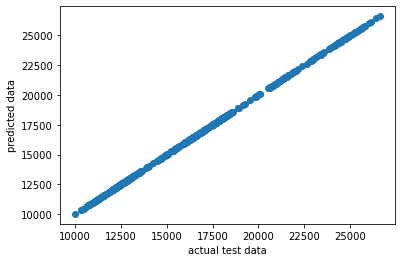

In [25]:
# checking scatter of data between y_test and predicted values
plt.scatter(y_test,predictvalues)
plt.xlabel('actual test data')
plt.ylabel('predicted data')